<a href="https://colab.research.google.com/github/WanjaWhoopie/HNG-Projects/blob/main/HNG_Stage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Get file

The first step in this project is to import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import spacy

We then mount our drive so we can upload the required document.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A little inspection shows 6 columns. Our column heads are in different structures, we have some NaN values and the TITLE column is too long. These are the things we will solve in the next section.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HNG12/HNG12-Stage1/productdata.csv')
df.head()

PRODUCTID                                              TITLE  \
0    1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1    2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2    2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3    1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4     283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCTTYPEID  \
0                                                NaN         1650.0   
1                                                NaN         2755.0   
2  Specifications: Color: Red, Material: Aluminiu...         7537.0   
3  AISHAH Women's Lycra Cotton Ankel Leggings. Br...         2996.0   
4                                                NaN         6112.0   

   ProductLength  
0    2125.980000  
1     393.700000  
2     748.031495  
3     787.401574  
4     598.424000

## Prepocessing

First we will make a column names to be in capital letters.

In [ ]:
# Rename columns in df to all caps for consistency

df.columns = [col.upper() for col in df.columns]
df.head()

PRODUCTID                                              TITLE  \
0    1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1    2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2    2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3    1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4     283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCTTYPEID  \
0                                                NaN         1650.0   
1                                                NaN         2755.0   
2  Specifications: Color: Red, Material: Aluminiu...         7537.0   
3  AISHAH Women's Lycra Cotton Ankel Leggings. Br...         2996.0   
4                                                NaN         6112.0   

   PRODUCTLENGTH  
0    2125.980000  
1     393.700000  
2     748.031495  
3     787.401574  
4     598.424000

Next, for consistency & readability, we use underscores for column names with two words or more.

In [ ]:
# Change col names for READABILITY
df = df.rename(columns={'PRODUCTID': 'PRODUCT_ID'})
df = df.rename(columns={'PRODUCTTYPEID': 'PRODUCT_TYPE_ID'})
df = df.rename(columns={'PRODUCTLENGTH': 'PRODUCT_LENGTH'})

df.head()

PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2     2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3     1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4      283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  \
0                                                NaN           1650.0   
1                                                NaN           2755.0   
2  Specifications: Color: Red, Material: Aluminiu...           7537.0   
3  AISHAH Women's Lycra Cotton Ankel Leggings. Br...           2996.0   
4                                                NaN           6112.0   

   PRODUCT_LENGTH  
0     2125.980000  
1      393.700000  
2      748.031495  
3      787.401574  
4      598.424000

Now we check for null values in our data frame. We realise PRODUCT_ID & TITLE columns are the only ones without null values.

In [ ]:
# Check for null values in each column of the dataframe
df.isnull().sum()

PRODUCT_ID            0
TITLE                 0
BULLET_POINTS      1591
DESCRIPTION        2144
PRODUCT_TYPE_ID     178
PRODUCT_LENGTH      178
dtype: int64

We have several null values as seen above. We can impute nulls in  PRODUCT_LENGTH with the average length.

In [ ]:
# Calculate the average of the 'PRODUCT_LENGTH' column, ignoring NaN values
average_product_length = df['PRODUCT_LENGTH'].mean()

# Fill NaN values in the 'PRODUCT_LENGTH' column with the calculated average
df.loc[df['PRODUCT_LENGTH'].isnull(), 'PRODUCT_LENGTH'] = average_product_length

df['PRODUCT_LENGTH']


0        2125.980000
1         393.700000
2         748.031495
3         787.401574
4         598.424000
5         950.000000
6         598.000000
7         984.251967
8         393.700000
9         393.700787
10        590.551180
11        433.070000
12        759.841000
13        600.000000
14        314.960630
15        670.000000
16        100.000000
17       1240.155000
18        500.000000
19        750.000000
20       1025.000000
21        577.000000
22        539.369000
23        640.000000
24        527.558000
25        393.700787
26        260.000000
27         31.496000
28        500.000000
29        450.000000
30        866.141731
31        255.905000
32       8000.000000
33        530.000000
34        598.424000
35        590.551180
36       1950.000000
37       3500.000000
38       1770.000000
39        700.000000
40        600.000000
41        559.054000
42        708.661417
43       1000.000000
44        490.000000
45        909.447000
46        950.000000
47       1300.000000
48       6300.000000
49        590.551180
50        550.000000
51       1325.000000
52        590.551180
53       1100.000000
54        614.000000
55         10.000000
56        800.000000
57         10.000000
58        744.000000
59         39.370079
60       3937.000000
61        700.000000
62        393.700787
63        940.000000
64        350.000000
65       3040.000000
66        393.700787
67       1402.000000
68        704.723000
69        700.000000
70        866.141731
71        600.000000
72        393.700787
73       1000.000000
74         11.811000
75       2800.000000
76         19.685000
77        696.849000
78        393.700787
79        944.880000
80        425.000000
81        866.141731
82        826.770000
83        800.000000
84        708.661417
85        550.000000
86        800.000000
87        600.000000
88        614.000000
89        236.220000
90        590.551180
91        196.850393
92        354.330708
93       1799.999998
94        598.424000
95        800.000000
96       8858.250000
97        450.000000
98        590.551180
99        400.000000
100       500.000000
101      1200.787400
102       600.000000
103       551.180000
104       196.850393
105       598.424000
106       600.000000
107       968.502000
108        70.000000
109      1326.771652
110       559.000000
111       314.960630
112       550.000000
113       600.000000
114       750.000000
115       430.000000
116       787.401574
117       118.110236
118       669.291338
119       708.661417
120       598.424000
121      1400.000000
122       196.850000
123       750.000000
124       472.440944
125       800.000000
126       600.000000
127       850.000000
128       850.000000
129       600.000000
130       598.424000
131      2000.000000
132       196.850393
133       600.000000
134       800.000000
135      1370.000000
136     10800.000000
137       393.700787
138       314.960630
139      1900.000000
140       708.661417
141      1300.000000
142      3900.000000
143      1799.999998
144       575.000000
145       803.000000
146       744.093000
147       570.865000
148       708.661417
149      8399.999991
150       688.976377
151       236.220472
152      1181.102361
153       314.960630
154      1259.842518
155      1098.423000
156      2400.000000
157       748.031495
158       600.000000
159      2000.000000
160      1800.000000
161       600.000000
162       500.000000
163       393.700787
164       756.000000
165       598.424000
166       472.440944
167       800.000000
168       590.551180
169       118.110236
170      1023.622046
171       393.700787
172       472.440944
173       625.000000
174      3300.000000
175      1080.000000
176       150.000000
177      1300.000000
178       999.999999
179      2362.204722
180       417.322834
181      2362.204722
182       725.000000
183      1181.102361
184       250.000000
185       118.110236
186      2519.000000
187       200.000000
188       550.000000
189      1350.000000
190      1

We now fill NaN values in the 'DESCRIPTION' column with the corresponding 'TITLE' values as we realised a lot of them are similar.

In [ ]:
# Fill NaN values in the 'DESCRIPTION' column with the corresponding 'TITLE' values
df.loc[df['DESCRIPTION'].isnull(), 'DESCRIPTION'] = df.loc[df['DESCRIPTION'].isnull(), 'TITLE']


In [ ]:
df['DESCRIPTION']

0       ArtzFolio Tulip Flowers Blackout Curtain for D...
1       Marks & Spencer Girls' Pyjama Sets T86_2561C_N...
2       Specifications: Color: Red, Material: Aluminiu...
3       AISHAH Women's Lycra Cotton Ankel Leggings. Br...
4       The United Empire Loyalists: A Chronicle of th...
5       HINS Brings you the most Elegant Looking Pot w...
6                           Ungifted: My Life and Journey
7       <p><strong>Aluminum Foil Stickers-good kitchen...
8       PUMA Cali Sport Clean Women's Sneakers White L...
9       Transform your home, workplace or hotel room i...
10      3NH Glasses Goggles Anti Fog Antis Windproof A...
11                               La Mure / Valbonnais gps
12      J'ecris des lettres! premiers exercices d'Ã©cr...
13      Mediterranean diet for beginners: 7Benefits of...
14      Segovia bottle consists of stainless steel whi...
15      Stone & Beam Fan Embossed Planter in Blue, Medium
16        Star Trek 50th Anniversary Cereamic Storage Jar
17      Steelbird Hi-Gn SBH-11 HUNK Glossy Black and B...
18      Kenneth Cole REACTION Men's Crespo Loafer B Sh...
19                                    MASTER OF THE RINGS
20      Cybrtrayd L049 No. 4 Lolly Chocolate Candy Mol...
21      <b>Welcome to our store. We aim to offer uniqu...
22      100 clÃ©s des villes sÅ“urs.Â Eu - Le TrÃ©port...
23      Training Camp: What the Best Do Better Than Ev...
24                            Peru, Los Senderos Posibles
25      PACK OF 65 INCENSE CONES. Best Quality Low Smo...
26       Lowepro Hipshot 20 for Flip Video Camera (Black)
27      <p>These Stylish Earring for Women and Girls a...
28      Size S upper chest circumference:64-72cm/25.2"...
29                                   1:64;First Editions0
30      Antique traditional handmade peacock wall deco...
31      <p>FMB120 small and professional tracker with ...
32      The Next Generation Bed Frame - The Premium 18...
33              Bloodlines: Race, Cross and the Christian
34      Works, Now First Collected: To Which Are Prefi...
35      <strong>About YinanLi Dress</strong>:<br />We ...
36      Decor Therapy 8347-01396096 (2 Pack) Outdoor P...
37       Full Throttle Wake Shocker 70" Covered Tube, Red
38                            Turtleneck Pullover Sweater
39      Capturing the flavour of finely wrought Renais...
40      Twin Flame Book of Positive Affirmations: Soul...
41                                           Inflorescent
42      Comfortable and light weight for daily use. At...
43      Pooplu Womens Cotton Plain Combo Pack of 3 Mul...
44                                Merry Nickmas / Various
45                             Duden Kindergarten Lexikon
46      Serve cool drinks in our 30 oz Jumbo Plastic M...
47                      adidas Predator 18+ FG- Black 7.5
48      HOMEIDEAS 100% Blackout Curtains 52 X 63 Inch ...
49      <p>âœ” This wool for knitting is good as a cro...
50      Seven Tips to Survival: Overcoming the Speed B...
51                             Four Seasons 2020 Calendar
52      How to Raise A Passerby Heroine Kato Megumi St...
53      Fruit of the Loom Men&#39;s Fleece Full Zip Ho...
54               Handbook of Classical and Modern Mandaic
55      This is a 12 x 18 Inch Size Poster Print, prin...
56      Chocolate Treats: Decadent Delights Free from ...
57      Fihapyli Workout Tank Tops for Women Sleeveles...
58      I Love Sloths More Than You: Blank Lined Journ...
59      <p><b>Feature:</b></p><p>1. 480X320 HD resolut...
60      <b>Under the Bed Storage Containers,Underbed S...
61                     Upanishads in Daily Life - English
62      Save space and get quick and easy access to yo...
63              Luber-finer LK281MB Heavy Duty Oil Filter
64      Come and Take It Black Flag Embroidered Patch ...
65            Monroe 272437 Quick Complete Strut Assembly
66      <p><strong>Do You Want Your Device To Look Dif...
67      The Remora Climbing Shoe is Mad Rock's do-it-a...
68      Dukat Und Griechisch-orthodoxes Patriarchat Vo..

In the 'BULLET_POINTS' column impute NaN values with "Not available" to show the ones that were blank.

In [ ]:
# Fill NaN values in the 'BULLET_POINTS' column with "Not available"
df.loc[df['BULLET_POINTS'].isnull(), 'BULLET_POINTS'] = "Not available"

df['BULLET_POINTS']

0       [LUXURIOUS & APPEALING: Beautiful custom-made ...
1       [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...
2       [Loud Dual Tone Trumpet Horn, Compatible With ...
3       [Made By 95%cotton and 5% Lycra which gives yo...
4                                           Not available
5       [Simple and elegant, great for displaying indo...
6                                           Not available
7       [HIGH QUALITY PVC MATERIAL: The kitchen alumin...
8       [Style Name:-Cali Sport Clean Women's Sneakers...
9       [100% Pure And Natural Essential Oil Or Fragra...
10      [Good quality and Suitable to use.,This Produc...
11                                          Not available
12                                          Not available
13                                          Not available
14      [Segovia bottle consists of stainless steel wh...
15                                          Not available
16                                          Not available
17      [High Impact ABS Material Shell,Replaceable an...
18      [Burnished metal center bit,Slightly padded Fo...
19                                          Not available
20                                          Not available
21      [â¤ã€Compatible modeã€‘:This mobile phone ca...
22                                          Not available
23                                          Not available
24                                          Not available
25      [Completed Natural & Herbal.,Fragrances:- Rose...
26                                          Not available
27      [Gemstone: Amethyst: Amethyst is a well known ...
28      [Note:the Size Is Much Smaller Than Us Size,do...
29      Hot Wheels 2004 First Editions Crooze Wail Tal...
30      [Size Approx ( in CM ) : Height 55 cm, Width 2...
31      [Cost Effective Small Light weight GPS Device,...
32      [Your purchase includes One Zinus Casey Premiu...
33                                          Not available
34                                          Not available
35      [Feature: A-Line, Deep V-Neck Long/Floor Lengt...
36      [Designed to fit most patio dining chairs,Fibe...
37                                          Not available
38      [â˜…Sizeï¼šXS=US (4-6) S=US(4-8), M=US(10-14),...
39      [12-Month Planner (January 2021 â€“ December 2...
40                                          Not available
41                                          Not available
42      [Check exact model of your phone, check (Setti...
43      [100 % Cotton,180 GSM Regular Fit T-Shirt,V Ne...
44                                          Not available
45                                          Not available
46      [30 oz.,High quality paper,Drink in style with...
47                                                 adidas
48      [â˜…100% BLACKOUT:Our curtains are made of 460...
49      [<p>ðŸ“Œ&nbsp;&nbsp;<b>FIBER COUNT</b>: Acryli...
50                                          Not available
51                                          Not available
52                                          Not available
53                                          Not available
54                                          Not available
55      [Pink Floyd The Wall Poster,Size : 12 x 18 Inc...
56                                          Not available
57      [The Back is made of mesh stitching. It looks ...
58                                          Not available
59      [Multifunctional use, can be used for other di...
60      [COMPLETELY BREATHABLE and 100% ECO-FRIENDLY-T...
61                                          Not available
62      [Our food storage boxes are with elegant and g...
63      [Micro-glass synthetic and cellulose medias pr...
64                                          Not available
65      [QUICKER, SAFER, EASIER and COMPLETE REPAIR --...
66      [Matte Laminated Skin For BACK and CAMERA Part...
67      [Upper Material: SynFlex,Closure: gore elastic...
68                                          Not availabl

We also replace NaN values in PRODUCT_TYPE_ID with 0000 for consistency in showing the blank ones.

In [ ]:
# Fill NaN values in the 'PRODUCT_TYPE_ID' column with "0000"

df['PRODUCT_TYPE_ID'] = df['PRODUCT_TYPE_ID'].fillna('0000')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRODUCT_ID       3847 non-null   int64  
 1   TITLE            3847 non-null   object 
 2   BULLET_POINTS    3847 non-null   object 
 3   DESCRIPTION      3847 non-null   object 
 4   PRODUCT_TYPE_ID  3847 non-null   object 
 5   PRODUCT_LENGTH   3847 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.5+ KB


Now we have no null values.



Change PRODUCT_TYPE_ID and PRODUCT_ID to string types. This is so they are not  be manipulated mathematically



In [ ]:
# Change PRODUCT_TYPE_ID and PRODUCT_ID to string types. They are not to be manipulated mathematically.

df = df.astype({'PRODUCT_TYPE_ID': 'str', 'PRODUCT_ID': 'str'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRODUCT_ID       3847 non-null   object 
 1   TITLE            3847 non-null   object 
 2   BULLET_POINTS    3847 non-null   object 
 3   DESCRIPTION      3847 non-null   object 
 4   PRODUCT_TYPE_ID  3847 non-null   object 
 5   PRODUCT_LENGTH   3847 non-null   float64
dtypes: float64(1), object(5)
memory usage: 180.5+ KB


Using the describe method, we get the stats and realise the PRODUCT_LENGTH average is 1150.53. An interesting observation is that the minimum is 1 and maximum is 96000. The range is quite wide and leaves a lot of room for investigation.

In [ ]:
df.describe()

PRODUCT_LENGTH
count     3847.000000
mean      1150.529020
std       2603.475740
min          1.000000
25%        530.000000
50%        669.291338
75%       1150.529020
max      96000.000000

In [ ]:
df.shape

(3847, 6)

This histogram shows the behaviour described above.

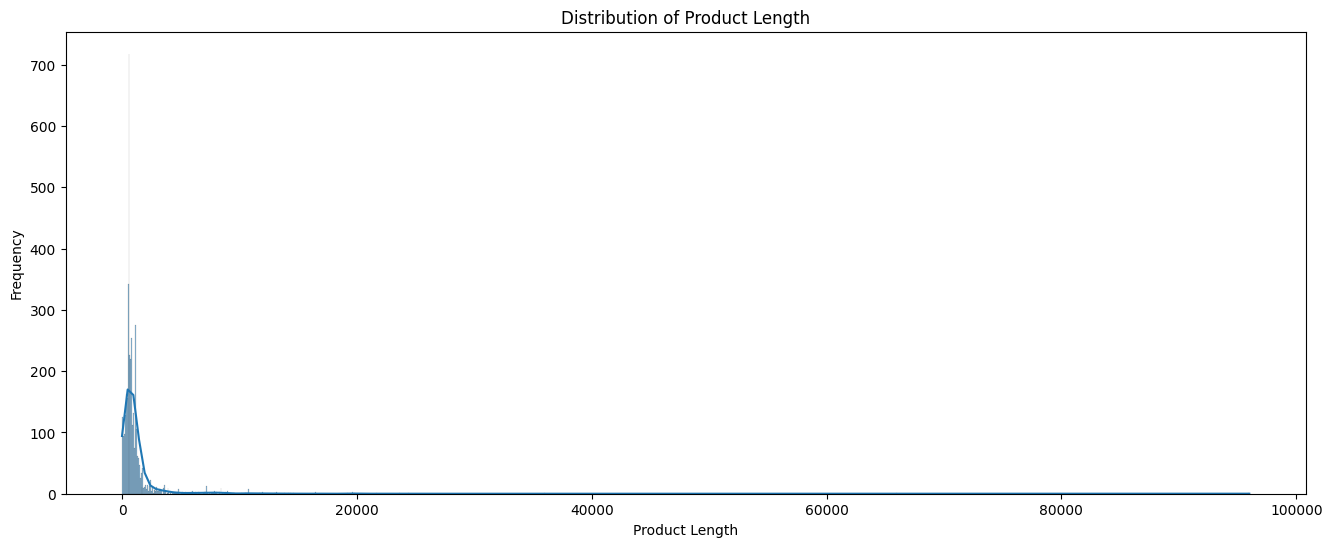

In [ ]:
# histogram  for  PRODUCT_LENGTH in df

plt.figure(figsize=(16, 6))
sns.histplot(df['PRODUCT_LENGTH'], kde=True)
plt.title('Distribution of Product Length')
plt.xlabel('Product Length')
plt.ylabel('Frequency')
plt.show()


We also plot a boxplot to show distribution that shows the outliers.

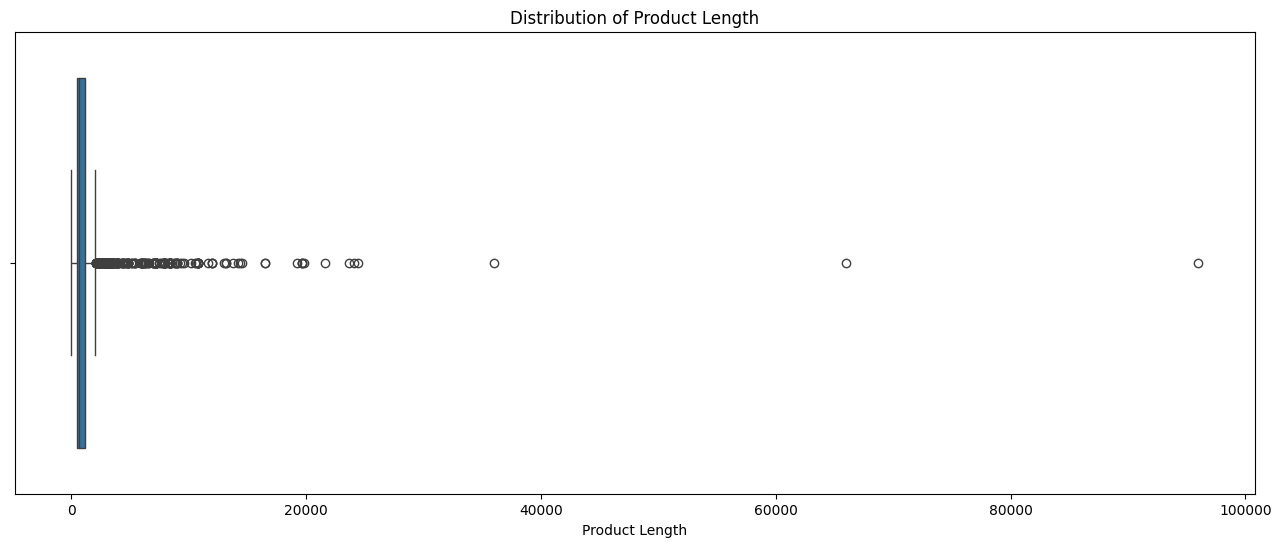

In [ ]:
plt.figure(figsize=(16, 6))  # Adjust figure size if needed
sns.boxplot(x=df['PRODUCT_LENGTH'])
plt.title('Distribution of Product Length')
plt.xlabel('Product Length')
plt.show()

The unique values below show it may not be a useful attribute.

In [ ]:
# Find unique values
df.nunique()


PRODUCT_ID         3541
TITLE              3541
BULLET_POINTS      2117
DESCRIPTION        3544
PRODUCT_TYPE_ID    1279
PRODUCT_LENGTH      793
dtype: int64

The next attributes to check for are duplicates. We realise 217 attributes at duplicated.

In [ ]:
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
#print(duplicate_rows.head())

# To get the number of duplicate rows
num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")

# To remove duplicate rows and keep only the first occurrence
#df_no_duplicates = df.drop_duplicates()



Number of duplicate rows: 217


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71      False
72      False
73      False
74      False
75      False
76      False
77      False
78      False
79      False
80      False
81      False
82      False
83      False
84      False
85      False
86      False
87      False
88      False
89      False
90      False
91      False
92      False
93      False
94      False
95      False
96      False
97      False
98      False
99      False
100     False
101     False
102     False
103     False
104     False
105     False
106     False
107     False
108     False
109     False
110     False
111     False
112     False
113     False
114     False
115     False
116     False
117     False
118     False
119     False
120     False
121     False
122     False
123     False
124     False
125     False
126     False
127     False
128     False
129     False
130     False
131     False
132     False
133     False
134     False
135     False
136     False
137     False
138     False
139     False
140     False
141     False
142     False
143     False
144     False
145     False
146     False
147     False
148     False
149     False
150     False
151     False
152     False
153     False
154     False
155     False
156     False
157     False
158     False
159     False
160     False
161     False
162     False
163     False
164     False
165     False
166     False
167     False
168     False
169     False
170     False
171     False
172     False
173     False
174     False
175     False
176     False
177     False
178     False
179     False
180     False
181     False
182     False
183     False
184     False
185     False
186     False
187     False
188     False
189     False
190     False
191     False
192     False
193     False
194     False
195     False
196     False
197     False
198     False
199     False
200     False
201     False
202     False
203     False
204     False
205     False
206     False
207     False
208     False
209     False
210     False
211     False
212     False
213     False
214     False
215     False
216     False
217     False
218     False
219     False
220     False
221     False
222     False
223     False
224     False
225     False
226     False
227     False
228     False
229     False
230     False
231     False
232     False
233     False
234     False
235     False
236     False
237     False
238     False
239     False
240     False
241     False
242     False
243     False
244     False
245     False
246     False
247     False
248     False
249     False
250     False
251     False
252     False
253     False
254     False
255     False
256     False
257     False
258     False
259     False
260     False
261     False
262     False
263     False
264     False
265     False
266     False
267     False
268     False
269     False
270     False
271     False
272     False
273     False
274     False
275     False
276     False
277     False
278     False
279     False
280     False
281     False
282     False
283     False
284     False
285     Fa

Drop the duplicates

In [ ]:
df = df.drop_duplicates()
df

PRODUCT_ID                                              TITLE  \
0       1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1       2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2       2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3       1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4        283658  The United Empire Loyalists: A Chronicle of th...   
5       2152929  HINS Metal Bucket Shape Plant Pot for Indoor &...   
6        413758                      Ungifted: My Life and Journey   
7       2026580  Delavala Self Adhesive Kitchen Backsplash Wall...   
8       2050239  PUMA Cali Sport Clean Women's Sneakers White L...   
9       2998633  Hexwell Essential oil for Home Fragrance Oil A...   
10      2857066  3NHÂ® Glasses Goggles Anti Fog Antis Windproof...   
11       833712                           La Mure / Valbonnais gps   
12       648364  J'ecris des lettres! premiers exercices d'Ã©cr...   
13      1991694  Mediterranean diet for beginners: 7Benefits of...   
14      2790448  SEGOVIA Single Walled Stainless Steel Sports| ...   
15      1810976  Stone & Beam Fan Embossed Planter in Blue, Medium   
16      1262926    Star Trek 50th Anniversary Cereamic Storage Jar   
17      1491106  Steelbird Hi-Gn SBH-11 HUNK Glossy Black and B...   
18      1543564  Kenneth Cole REACTION Men's Crespo Loafer B Sh...   
19       793582                                MASTER OF THE RINGS   
20      1045826  Cybrtrayd L049 No. 4 Lolly Chocolate Candy Mol...   
21      2964715  Twisted Swirl Vintage Blue Phone Case Compatib...   
22       655356  100 clÃ©s des villes sÅ“urs.Â Eu - Le TrÃ©port...   
23       459135  Training Camp: What the Best Do Better Than Ev...   
24       748018                        Peru, Los Senderos Posibles   
25      2120903     JSR CART Incense Cones Rose (Pack of 65 Cones)   
26       879159   Lowepro Hipshot 20 for Flip Video Camera (Black)   
27      2273102  Redgem 925 Silver Stud Earrings for Girls and ...   
28      1724966  BaronHong Seamless Underwear Half Length Chest...   
29       854763  Hot Wheels 2004 First Editions Crooze Wail Tal...   
30      2075497  Antique Home Decor Wooden Hand Painted and Han...   
31      2367805  GEOSHADOW FMB120 High-end Small Light Weight G...   
32      1188856  Zinus 18 Inch Premium SmartBase Mattress Found...   
33      2165448          Bloodlines: Race, Cross and the Christian   
34       292637  Works, Now First Collected: To Which Are Prefi...   
35      1955999  Women's A Line Open Back Satin Prom Dress Long...   
36      2543433  Decor Therapy 8347-01396096 (2 Pack) Outdoor P...   
37      1108294   Full Throttle Wake Shocker 70" Covered Tube, Red   
38      2535064  LILLUSORY Women's Turtleneck Oversized Sweater...   
39      1962527      Paperblanks 2021 Midnight Steel Midi 12-Month   
40       213498  Twin Flame Book of Positive Affirmations: Soul...   
41      1676450                                       Inflorescent   
42      2779227  Stunned Trendy, Latest, Classy Attractive Look...   
43      1519827  Pooplu Womens Plain V Neck Half Sleeves Pack o...   
44       993228                            Merry Nickmas / Various   
45       699328                         Duden Kindergarten Lexikon   
46      1329311  Amscan 354001.54 Jumbo Margarita Glass, 30 oz,...   
47      1501832  adidas Men's Predator 18+ FG Firm Ground Socce...   
48      1706369  HOMEIDEAS 100% Blackout Curtains 52 X 63 Inch ...   
49      2514546  Oswal Multi Berry (300 gm) Wool Hank Hand Knit...   
50       385308  Seven Tips to Survival: Overcoming the Speed B...   
51       370796                         Four Seasons 2020 Calendar   
52      2632764  How to Raise A Passerby Heroine Kato Megumi St...   
53      1033263  Fruit of the Loom Men&#39;s Fleece Full Zip Ho...   
54       669543           Handbook of Classical and Modern Mandaic   
55      2749965  PosterHub Pink Floyd The Wall Poster Matte Fin...   
56       535662

## Short Title

We use spacy because of its capabilities for part-of-speech tagging and dependency parsing to extract relevant information.

In [ ]:
nlp = spacy.load("en_core_web_sm")

def create_short_title(title):
    doc = nlp(title)

    # Prioritize Product Type:
    product_types = [token.text for token in doc if token.pos_ in ["NOUN"] and token.dep_ in ["ROOT", "dobj"]]
    if product_types:
        short_title = product_types[0]  # Use the main product type as a base
    else:
        short_title = ""  # Handle cases where product type isn't clear

    # Add Distinguishing Features:
    for token in doc:
        if token.pos_ in ["ADJ", "PROPN"] and token.text.lower() not in ["for", "of", "and", "with", "&"]:
            short_title += " " + token.text  # Add adjectives and proper nouns for specifics

    # Limit Length:
    short_title = short_title[:50]  # Truncate if exceeding a desired length

              # Truncate at word boundary (if exceeding 50 characters)
    if len(short_title) > 50:
        short_title = short_title[:short_title.rfind(' ', 0, 50)]

    # Handle quantities
    quantity_match = re.search(r"Set of (\d+)|Pack of (\d+)|Combo of (\d+)", title) # Example quantity patterns
    if quantity_match:
        quantity = quantity_match.group(1) or quantity_match.group(2)  # Get the quantity
        short_title += f" - {quantity} PCS"  # Append quantity

    # Remove special characters
    short_title = re.sub(r"[^a-zA-Z0-9 ]", "", short_title)


    return short_title.strip()  # Remove leading/trailing spaces

# Apply the function to your DataFrame
df["short_title"] = df["TITLE"].apply(create_short_title)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
pd.set_option("display.max_rows", None)
df

PRODUCT_ID                                              TITLE  \
0       1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1       2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2       2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3       1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4        283658  The United Empire Loyalists: A Chronicle of th...   
5       2152929  HINS Metal Bucket Shape Plant Pot for Indoor &...   
6        413758                      Ungifted: My Life and Journey   
7       2026580  Delavala Self Adhesive Kitchen Backsplash Wall...   
8       2050239  PUMA Cali Sport Clean Women's Sneakers White L...   
9       2998633  Hexwell Essential oil for Home Fragrance Oil A...   
10      2857066  3NHÂ® Glasses Goggles Anti Fog Antis Windproof...   
11       833712                           La Mure / Valbonnais gps   
12       648364  J'ecris des lettres! premiers exercices d'Ã©cr...   
13      1991694  Mediterranean diet for beginners: 7Benefits of...   
14      2790448  SEGOVIA Single Walled Stainless Steel Sports| ...   
15      1810976  Stone & Beam Fan Embossed Planter in Blue, Medium   
16      1262926    Star Trek 50th Anniversary Cereamic Storage Jar   
17      1491106  Steelbird Hi-Gn SBH-11 HUNK Glossy Black and B...   
18      1543564  Kenneth Cole REACTION Men's Crespo Loafer B Sh...   
19       793582                                MASTER OF THE RINGS   
20      1045826  Cybrtrayd L049 No. 4 Lolly Chocolate Candy Mol...   
21      2964715  Twisted Swirl Vintage Blue Phone Case Compatib...   
22       655356  100 clÃ©s des villes sÅ“urs.Â Eu - Le TrÃ©port...   
23       459135  Training Camp: What the Best Do Better Than Ev...   
24       748018                        Peru, Los Senderos Posibles   
25      2120903     JSR CART Incense Cones Rose (Pack of 65 Cones)   
26       879159   Lowepro Hipshot 20 for Flip Video Camera (Black)   
27      2273102  Redgem 925 Silver Stud Earrings for Girls and ...   
28      1724966  BaronHong Seamless Underwear Half Length Chest...   
29       854763  Hot Wheels 2004 First Editions Crooze Wail Tal...   
30      2075497  Antique Home Decor Wooden Hand Painted and Han...   
31      2367805  GEOSHADOW FMB120 High-end Small Light Weight G...   
32      1188856  Zinus 18 Inch Premium SmartBase Mattress Found...   
33      2165448          Bloodlines: Race, Cross and the Christian   
34       292637  Works, Now First Collected: To Which Are Prefi...   
35      1955999  Women's A Line Open Back Satin Prom Dress Long...   
36      2543433  Decor Therapy 8347-01396096 (2 Pack) Outdoor P...   
37      1108294   Full Throttle Wake Shocker 70" Covered Tube, Red   
38      2535064  LILLUSORY Women's Turtleneck Oversized Sweater...   
39      1962527      Paperblanks 2021 Midnight Steel Midi 12-Month   
40       213498  Twin Flame Book of Positive Affirmations: Soul...   
41      1676450                                       Inflorescent   
42      2779227  Stunned Trendy, Latest, Classy Attractive Look...   
43      1519827  Pooplu Womens Plain V Neck Half Sleeves Pack o...   
44       993228                            Merry Nickmas / Various   
45       699328                         Duden Kindergarten Lexikon   
46      1329311  Amscan 354001.54 Jumbo Margarita Glass, 30 oz,...   
47      1501832  adidas Men's Predator 18+ FG Firm Ground Socce...   
48      1706369  HOMEIDEAS 100% Blackout Curtains 52 X 63 Inch ...   
49      2514546  Oswal Multi Berry (300 gm) Wool Hank Hand Knit...   
50       385308  Seven Tips to Survival: Overcoming the Speed B...   
51       370796                         Four Seasons 2020 Calendar   
52      2632764  How to Raise A Passerby Heroine Kato Megumi St...   
53      1033263  Fruit of the Loom Men&#39;s Fleece Full Zip Ho...   
54       669543           Handbook of Classical and Modern Mandaic   
55      2749965  PosterHub Pink Floyd The Wall Poster Matte Fin...   
56       535662

**Examples of the output:**

Original: Can the Dead Communicate with the Living?

Modified: Dead Communicate



Now we save our cleaned df as a csv.

In [ ]:
df.to_csv('clean_product_data.csv')